In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0); # Large figures

Populating the interactive namespace from numpy and matplotlib


In [2]:
# gx3v7 output; nstep output
# Tracing reason for error message
# Message from (lon, lat) ( 302.489,  42.997), which is global (i,j) (95, 80)
filename = '/Users/mlevy/C1850ECO.T62_g37.passes_Pmassbal_nstep_out.pop.h.0001-01-05-24192.nc'
ds = xr.open_dataset(filename, decode_times=False, decode_coords=False)

In [3]:
# Variables to keep in dataset
grid_vars = ['TLAT', 'TLONG', 'z_t', 'z_t_150m', 'z_w_bot', 'dz']
POP_vars = ['Jint_Ctot', 'Jint_Ptot', 'POP_PROD']
vars_to_keep = grid_vars + POP_vars

# Fortran error message is indexed starting from 1
# Python indices start from 0
lat_in = 79
lon_in = 94

raw_data = ds.isel(time=0).drop([v for v in ds.variables if v not in vars_to_keep])
single_col = ds.isel(time=0, nlat=lat_in, nlon=lon_in).drop([v for v in ds.variables if v not in vars_to_keep])
print single_col['TLONG'].values, single_col['TLAT'].values

302.488515327 42.9973933488


/Volumes/OriginalHD/Users/mlevy/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Volumes/OriginalHD/Users/mlevy/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


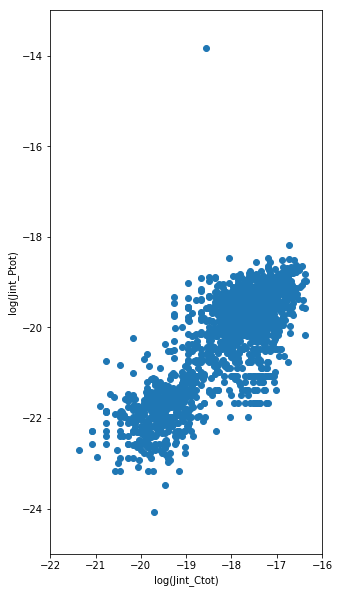

In [4]:
plt.scatter(np.log10(raw_data['Jint_Ctot'].values),np.log10(raw_data['Jint_Ptot'].values))
plt.xlabel('log(Jint_Ctot)')
plt.xlim([-22,-16])
plt.ylim([-25,-13])
plt.ylabel('log(Jint_Ptot)')
plt.axes().set_aspect('equal')